In [45]:
import random
from itertools import permutations
alltours = permutations

def distance_tour(aTour):
  return sum(distance_points(aTour[i - 1], aTour[i]) for i in range(len(aTour)))

aCity = complex

def distance_points(first, second):
  return abs(first - second)

def generate_cities(number_of_cities):
  seed=111; width = 500; height = 300
  random.seed(number_of_cities, seed)
  return frozenset(aCity(random.randint(1, width), random.randint(1, height)) for c in range(number_of_cities))

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

def visualize_tour(tour, style='bo-'):
  if len(tour) > 1000: plt.figure(figsize=(15,10))
  start = tour[0:1]
  visualize_segment(tour + start, style)
  visualize_segment(start, 'rD')
def visualize_segment (segment, style='bo-'):
  plt.plot([X(c) for c in segment], [Y(c) for c in segment], style, clip_on=False)
  plt.axis('scaled')
  plt.axis('off')

def X(city): "X axis"; return city.real

def Y(city): "Y axis"; return city.imag

In [55]:
from time import process_time
from collections import Counter
def tsp(algorithm, cities):
  t0 = process_time()
  tour = algorithm(cities)
  t1 = process_time()
  assert Counter(tour) == Counter(cities)
  visualize_tour(tour)
  print("{}:{} cities => tour length {:.0f}(in {:.3f} sec)".format(name(algorithm), len(tour), distance_tour(tour), t1-t0))

def name(algorithm):
  return algorithm.__name__.replace('_tsp','')

In [56]:
def brute_force(cities):
  "Generate all possible tours of the cities and choose the shortest tour"
  return shortest_tour(alltours(cities))
def shortest_tour(tours):
  return min(tours, key=distance_tour)

brute_force:10 cities => tour length 1206(in 12.091 sec)


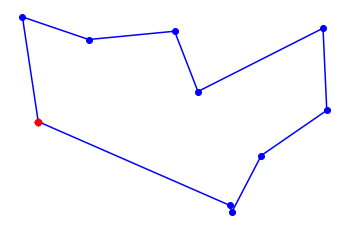

In [60]:
tsp(brute_force, generate_cities(10))